# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [4]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [5]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

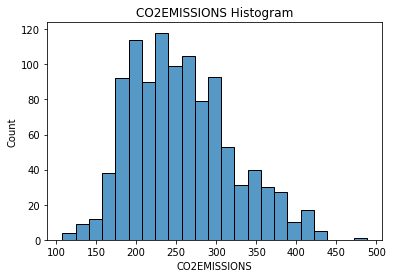

In [8]:
sns.histplot(df['CO2EMISSIONS'])
plt.title('CO2EMISSIONS Histogram')

plt.show();

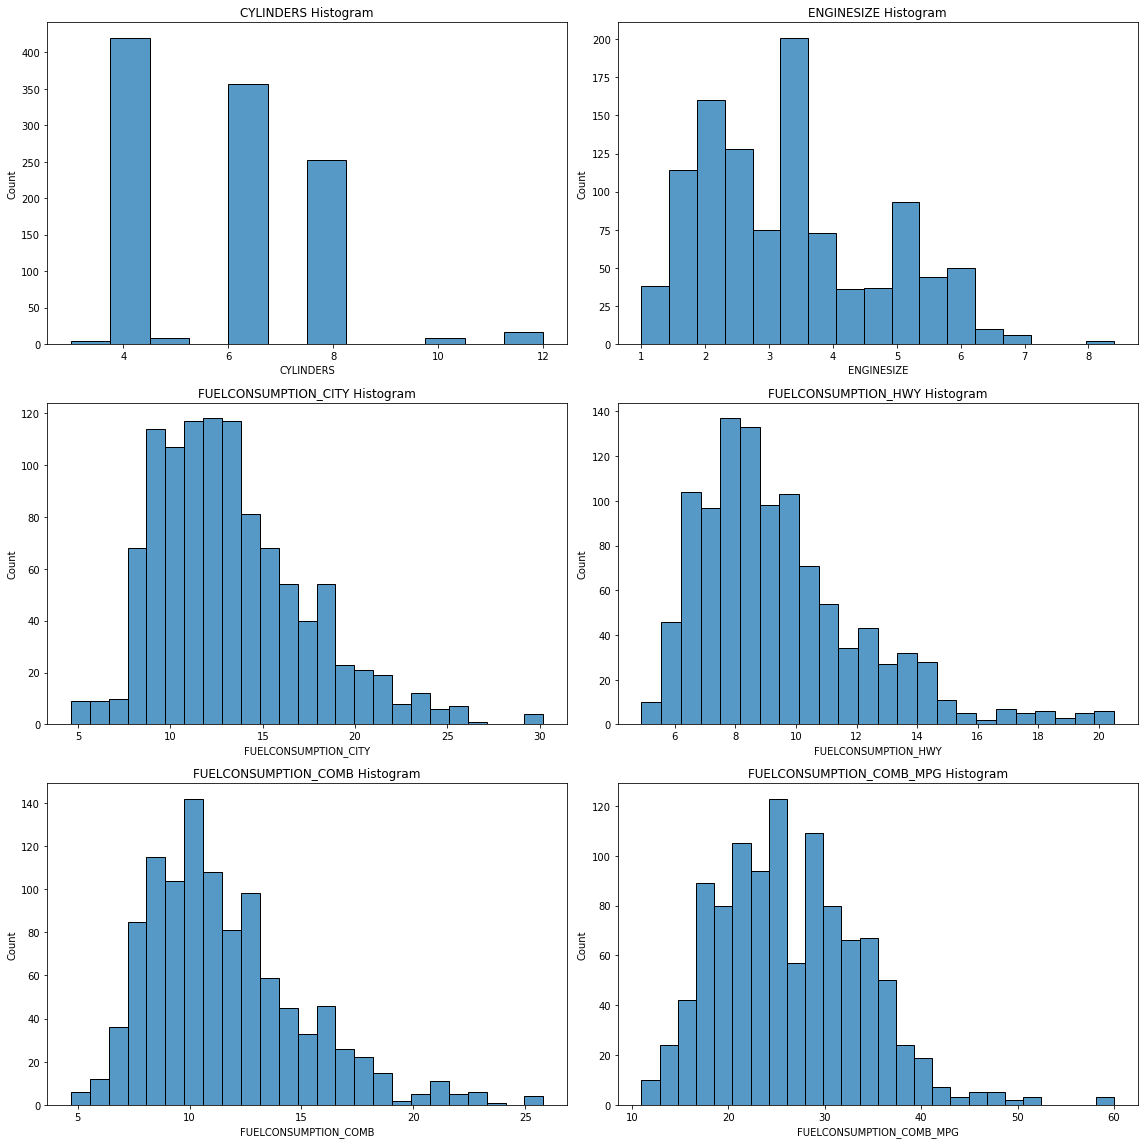

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

sns.histplot(df['CYLINDERS'], ax=axs[0, 0])
axs[0, 0].set_title('CYLINDERS Histogram')

sns.histplot(df['ENGINESIZE'], ax=axs[0, 1])
axs[0, 1].set_title('ENGINESIZE Histogram')

sns.histplot(df['FUELCONSUMPTION_CITY'], ax=axs[1, 0])
axs[1, 0].set_title('FUELCONSUMPTION_CITY Histogram')

sns.histplot(df['FUELCONSUMPTION_HWY'], ax=axs[1, 1])
axs[1, 1].set_title('FUELCONSUMPTION_HWY Histogram')

sns.histplot(df['FUELCONSUMPTION_COMB'], ax=axs[2, 0])
axs[2, 0].set_title('FUELCONSUMPTION_COMB Histogram')

sns.histplot(df['FUELCONSUMPTION_COMB_MPG'], ax=axs[2, 1])
axs[2, 1].set_title('FUELCONSUMPTION_COMB_MPG Histogram')

plt.tight_layout()

plt.show();

# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

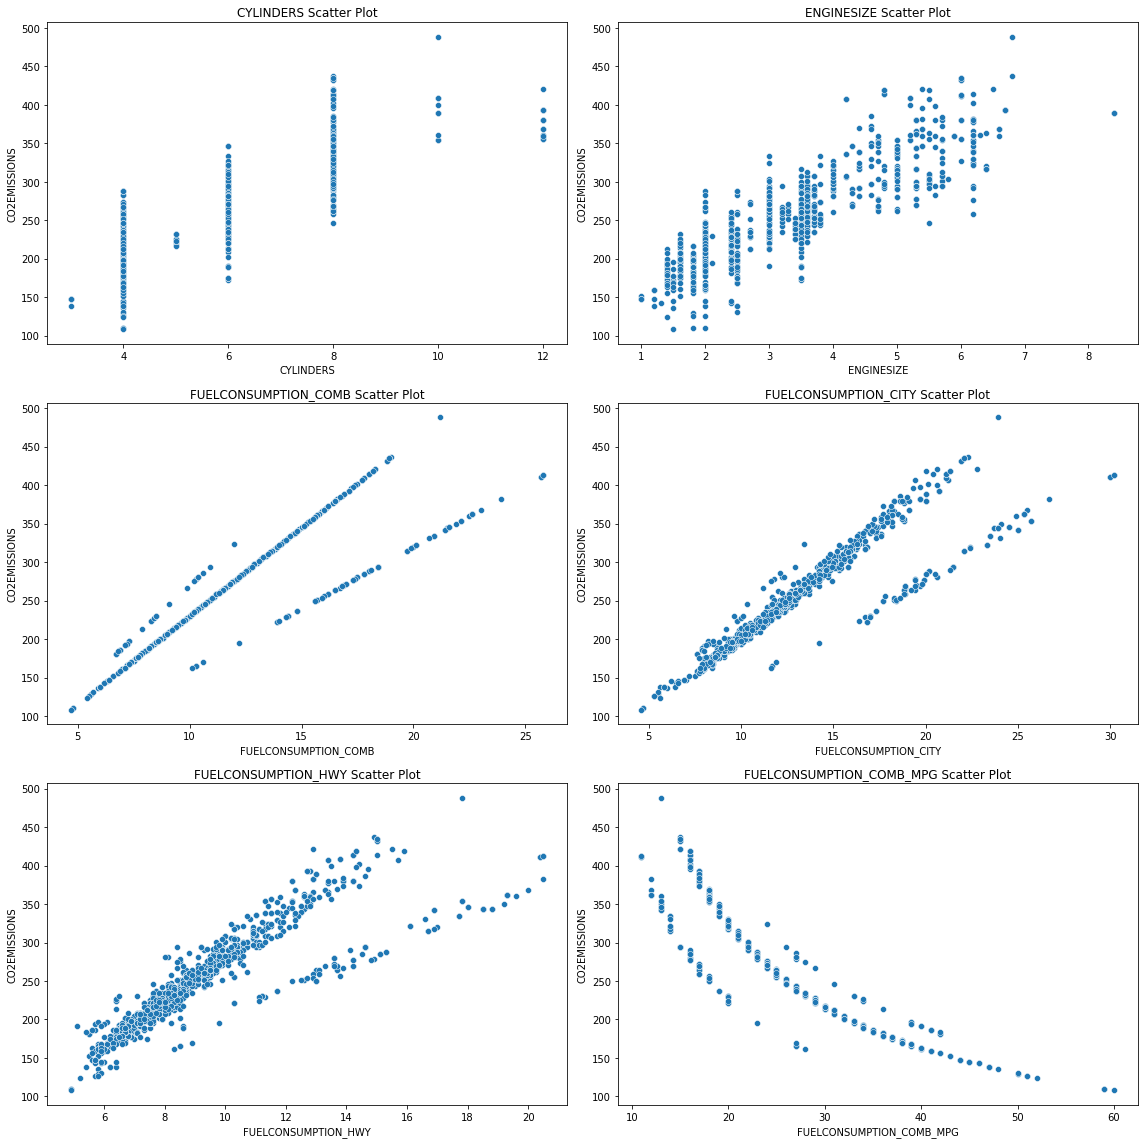

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

sns.scatterplot(df['CYLINDERS'], df['CO2EMISSIONS'], ax=axs[0, 0])
axs[0, 0].set_title('CYLINDERS Scatter Plot')

sns.scatterplot(df['ENGINESIZE'], df['CO2EMISSIONS'], ax=axs[0, 1])
axs[0, 1].set_title('ENGINESIZE Scatter Plot')

sns.scatterplot(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], ax=axs[1, 0])
axs[1, 0].set_title('FUELCONSUMPTION_COMB Scatter Plot')

sns.scatterplot(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'], ax=axs[1, 1])
axs[1, 1].set_title('FUELCONSUMPTION_CITY Scatter Plot')

sns.scatterplot(df['FUELCONSUMPTION_HWY'], df['CO2EMISSIONS'], ax=axs[2, 0])
axs[2, 0].set_title('FUELCONSUMPTION_HWY Scatter Plot')

sns.scatterplot(df['FUELCONSUMPTION_COMB_MPG'], df['CO2EMISSIONS'], ax=axs[2, 1])
axs[2, 1].set_title('FUELCONSUMPTION_COMB_MPG Scatter Plot')

plt.tight_layout()

plt.show();

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

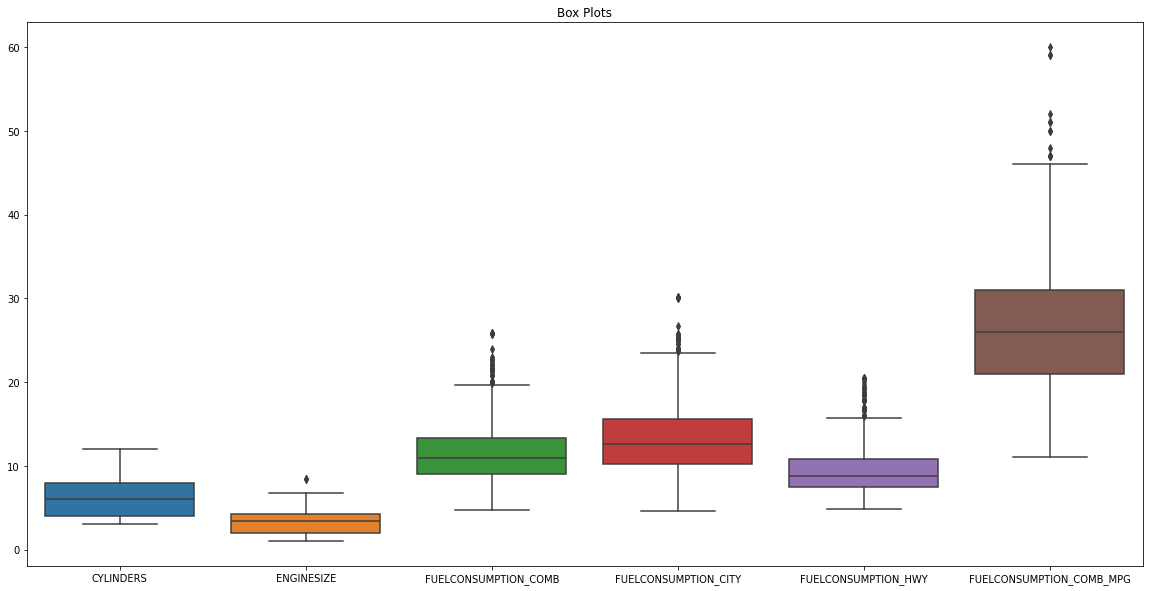

In [11]:
data = [
    df['CYLINDERS'], df['ENGINESIZE'], df['FUELCONSUMPTION_COMB'],
    df['FUELCONSUMPTION_CITY'], df['FUELCONSUMPTION_HWY'], df['FUELCONSUMPTION_COMB_MPG']
]

labels = [
    'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG'
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

# Exercise 4 : Remove Outliers

In [12]:
Q1 = np.percentile(df['CYLINDERS'], 25)
Q3 = np.percentile(df['CYLINDERS'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CYLINDERS'] >= lower_bound) & (df['CYLINDERS'] <= upper_bound)]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [13]:
Q1 = np.percentile(df['ENGINESIZE'], 25)
Q3 = np.percentile(df['ENGINESIZE'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ENGINESIZE'] >= lower_bound) & (df['ENGINESIZE'] <= upper_bound)]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [14]:
Q1 = np.percentile(df['FUELCONSUMPTION_CITY'], 25)
Q3 = np.percentile(df['FUELCONSUMPTION_CITY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_CITY'] >= lower_bound) & (df['FUELCONSUMPTION_CITY'] <= upper_bound)]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [15]:
Q1 = np.percentile(df['FUELCONSUMPTION_HWY'], 25)
Q3 = np.percentile(df['FUELCONSUMPTION_HWY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_HWY'] >= lower_bound) & (df['FUELCONSUMPTION_HWY'] <= upper_bound)]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [16]:
Q1 = np.percentile(df['FUELCONSUMPTION_COMB'], 25)
Q3 = np.percentile(df['FUELCONSUMPTION_COMB'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_COMB'] >= lower_bound) & (df['FUELCONSUMPTION_COMB'] <= upper_bound)]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [17]:
Q1 = np.percentile(df['FUELCONSUMPTION_COMB_MPG'], 25)
Q3 = np.percentile(df['FUELCONSUMPTION_COMB_MPG'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FUELCONSUMPTION_COMB_MPG'] >= lower_bound) & (df['FUELCONSUMPTION_COMB_MPG'] <= upper_bound)]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


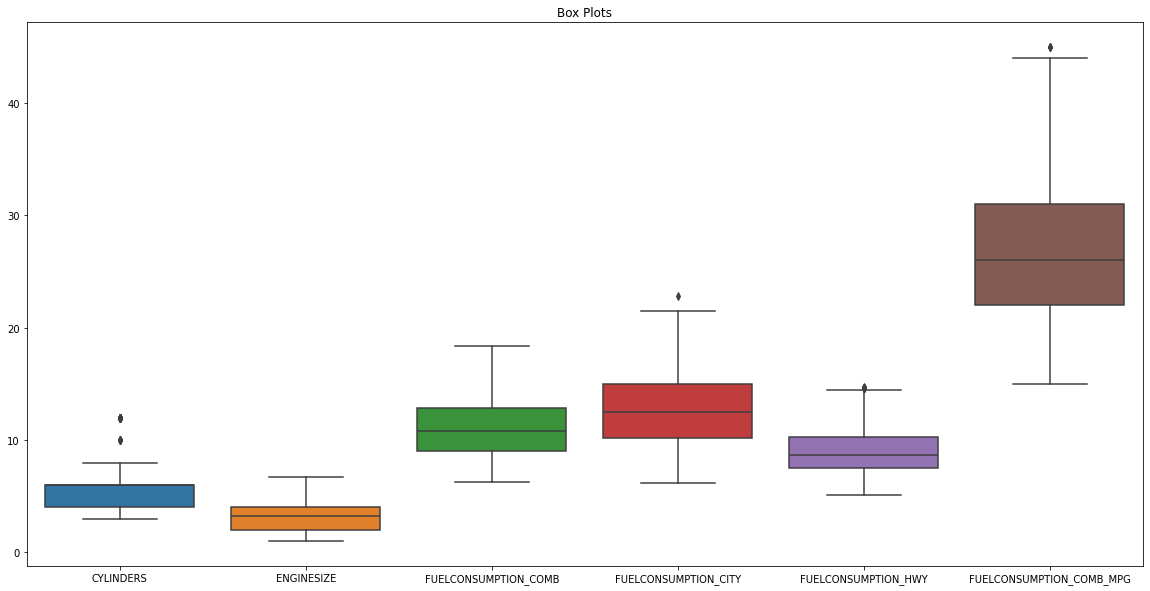

In [18]:
data = [
    df['CYLINDERS'], df['ENGINESIZE'], df['FUELCONSUMPTION_COMB'],
    df['FUELCONSUMPTION_CITY'], df['FUELCONSUMPTION_HWY'], df['FUELCONSUMPTION_COMB_MPG']
]

labels = [
    'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG'
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [19]:
X = df.drop('CO2EMISSIONS', axis = 1)
Y = df['CO2EMISSIONS']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 6), (201, 6), (800,), (201,))

# Exercise 4 : Train the Model

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [23]:
regr = LinearRegression()
train_x = X_train[['ENGINESIZE']]

# train_x = np.asanyarray(X_train[['ENGINESIZE']])
regr.fit(train_x, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

Coefficients (w) :  [36.49207556]
Intercept    (b) :  132.81709141476625


# Exercise 5 : Plot the Output

Plot linear regression model (output).

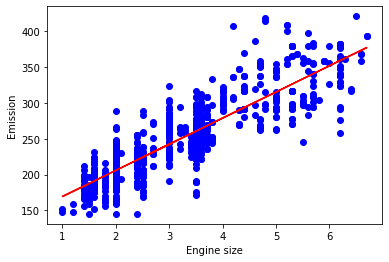

In [24]:
plt.scatter(train_x, Y_train,  color='blue')

ll = regr.coef_[0] * train_x + regr.intercept_

plt.plot(train_x, ll, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

plt.show();

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [25]:
test_x = X_test[['ENGINESIZE']]
#test_x = np.asanyarray(X_test[['ENGINESIZE']])
y_pred = regr.predict(test_x)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Mean Squared Error: 993.32
Mean Absolute Error: 23.23
R2-score: 0.75


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

Coefficients (w) :  [27.58764406]
Intercept    (b) :  94.3842686513785


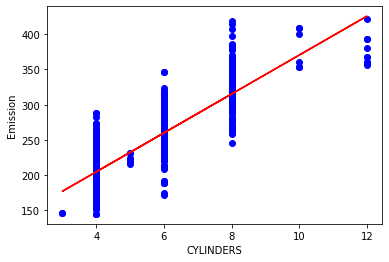

Mean Squared Error: 1157.75
Mean Absolute Error: 26.01
R2-score: 0.71


In [26]:
regr = LinearRegression()
train_x = np.asanyarray(X_train[['CYLINDERS']])
regr.fit(train_x, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

plt.scatter(train_x, Y_train,  color='blue')
ll = regr.coef_[0] * train_x + regr.intercept_
plt.plot(train_x, ll, '-r')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

plt.show();

test_x = np.asanyarray(X_test[['CYLINDERS']])
y_pred = regr.predict(test_x)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Coefficients (w) :  [18.58776501]
Intercept    (b) :  44.123563492739066


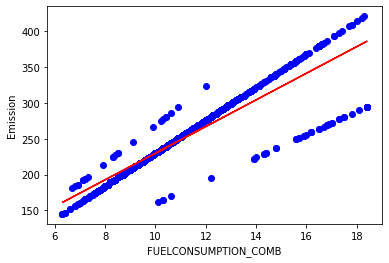

Mean Squared Error: 433.81
Mean Absolute Error: 12.95
R2-score: 0.89


In [27]:
regr = LinearRegression()
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_COMB']])
regr.fit(train_x, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

plt.scatter(train_x, Y_train,  color='blue')
ll = regr.coef_[0] * train_x + regr.intercept_
plt.plot(train_x, ll, '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

plt.show();

test_x = np.asanyarray(X_test[['FUELCONSUMPTION_COMB']])
y_pred = regr.predict(test_x)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Coefficients (w) :  [15.42956194]
Intercept    (b) :  53.45337184028304


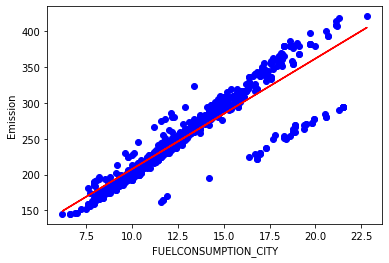

Mean Squared Error: 469.13
Mean Absolute Error: 13.55
R2-score: 0.88


In [28]:
regr = LinearRegression()
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_CITY']])
regr.fit(train_x, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

plt.scatter(train_x, Y_train,  color='blue')
ll = regr.coef_[0] * train_x + regr.intercept_
plt.plot(train_x, ll, '-r')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

plt.show();

test_x = np.asanyarray(X_test[['FUELCONSUMPTION_CITY']])
y_pred = regr.predict(test_x)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Coefficients (w) :  [23.33455849]
Intercept    (b) :  39.321729590989634


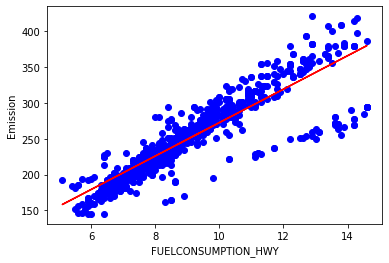

Mean Squared Error: 561.32
Mean Absolute Error: 16.26
R2-score: 0.86


In [29]:
regr = LinearRegression()
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_HWY']])
regr.fit(train_x, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

plt.scatter(train_x, Y_train,  color='blue')
ll = regr.coef_[0] * train_x + regr.intercept_
plt.plot(train_x, ll, '-r')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")

plt.show();

test_x = np.asanyarray(X_test[['FUELCONSUMPTION_HWY']])
y_pred = regr.predict(test_x)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Coefficients (w) :  [-8.02318339]
Intercept    (b) :  466.4811197041235


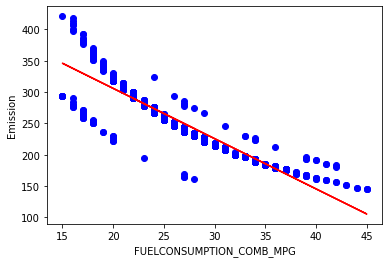

Mean Squared Error: 562.72
Mean Absolute Error: 15.27
R2-score: 0.86


In [30]:
regr = LinearRegression()
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_COMB_MPG']])
regr.fit(train_x, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

plt.scatter(train_x, Y_train,  color='blue')
ll = regr.coef_[0] * train_x + regr.intercept_
plt.plot(train_x, ll, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

plt.show();

test_x = np.asanyarray(X_test[['FUELCONSUMPTION_COMB_MPG']])
y_pred = regr.predict(test_x)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.

In [31]:
X_train = X_train.drop('FUELCONSUMPTION_COMB_MPG', axis=1)
X_test = X_test.drop('FUELCONSUMPTION_COMB_MPG', axis=1)

regr = LinearRegression()

regr.fit(X_train, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ', regr.intercept_)

y_pred = regr.predict(X_test)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, y_pred))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Coefficients (w) :  [  7.26374293   7.83353901 -12.65530843  -4.73018864  30.32120897]
Intercept    (b) :  50.34824068199049
Mean Squared Error: 382.71
Mean Absolute Error: 13.28
R2-score: 0.90
